<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AI Bootcamp / SECTION 4*

---

# Small Project 2. Attention & Transformer

## 🏆 학습 목표

- Atenttion Mechanism의 탄생 배경과 연산 과정에 대해 설명할 수 있다.
- Transformer의 구조에 대해 이해하고 설명할 수 있다.
  - 기존 RNN 기반의 언어 모델과 비교했을 때, Transformer가 가지고 있는 장점에 대해 설명할 수 있다.
  - Transformer의 main idea인 **Self-attention Mechanism**에 대해 이해하고 설명할 수 있다.
  - Transformer 모델을 코드로 구현할 수 있다.

## 🛫 Warm up

RNN이 갖고 있는 단점에 대해 기억하시나요? 🤔
- 장기 의존성(Long-term Dependency) 문제
- 병렬화 불가

<br>이번 노트에서는 기계 번역(Machine Translation)을 위한 **Seq2Seq** 모델부터 RNN의 단점으로 발생한 한계점을 보완한 **Attention Mechanism**,  
그리고 Attention Mechanism을 극대화하여 번역 성능을 극대화한 **Transformer**까지 알아볼 것입니다.  

<br>딥러닝에 대해 학습할 때는 Task 해결을 위해 처음에 어떤 모델이 제안되고, 이후에 어떤 단점이 나타나고,  
그 단점은 어떤 방법을 이용해 해결되었는지 시간의 흐름대로 학습해가는 것이 중요합니다.  
여러분도 시간의 흐름대로 정리해가며 학습해보시는 것을 추천드립니다! 💪

## 🙇 들어가기 전에!

이번 노트에서는 자연어 처리를 위해 제안된 매커니즘과 이를 활용한 대표적인 모델에 대해 다루고 있습니다.  
아래의 내용에 대해 선행 지식이 부족하다면 본 노트를 이해하기 어려울 수 있습니다.
- 인공 신경망에 대한 기본 개념 및 용어
- 자연어 처리(Natural Language Processing, NLP)에 대한 기본 개념 및 용어
- 벡터화(Vectorization) & 워드 임베딩(Word Embedding)
- 순환 신경망(Recurrent Neural Network, RNN)의 구조 및 장단점

## ***1. Attention Mechanism***

---


### **Attention Mechanism의 등장 배경**

#### **시퀀스-투-시퀀스 (Sequence-to-Sequence, Seq2Seq)**

Attention에 대해서 알아보기 위해 먼저 Seq2Seq에 대해서 간단하게 살펴보겠습니다.  

<br>Seq2Seq는 RNN을 기반으로 한 언어 모델(Language Model)이며, 시퀀스를 입력하고 원하는 출력 시퀀스를 만들어내는 모델입니다.  
그리고 기계 번역(Machine Translation)을 구현하기 위해 만들어진 대표적인 모델입니다.

<br>아래 이미지는 불어를 영어로 번역하는 상황이라 가정하고 Seq2Seq 모델의 세부 구조를 도식화한 이미지입니다.

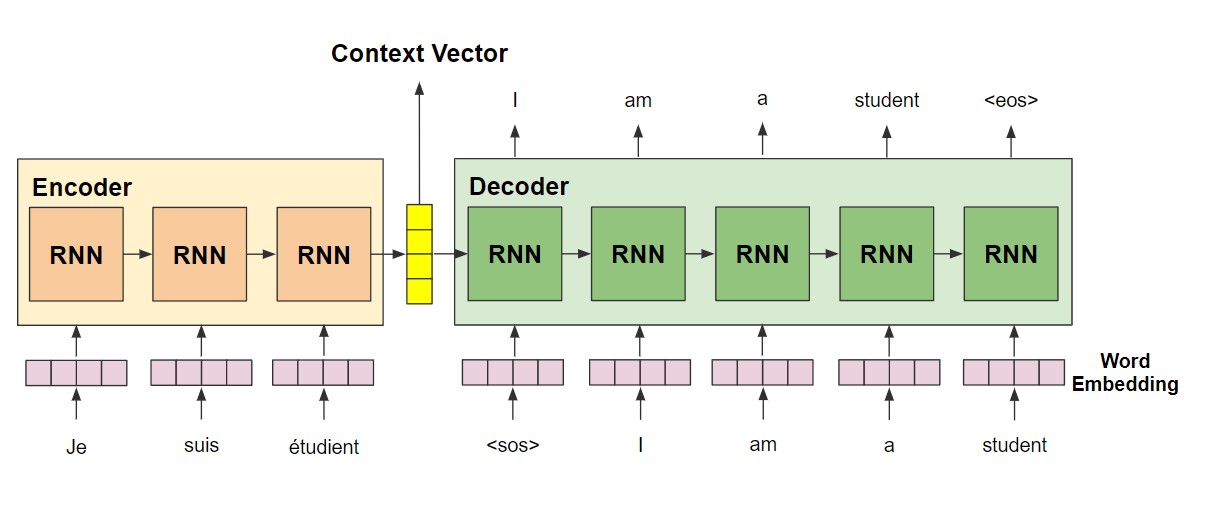

seq2seq는 크게 **인코더(Encoder)**와 **디코더(Decoder)**라 불리는 두 개의 스테이지로 구성됩니다.

<br>입력될 텍스트는 모두 토큰화한 후, **<font color='magenta'>임베딩 벡터</font>**로 만들어져 입력되게 됩니다.  
인코더와 디코더 안에 각각의 RNN 셀은 우리가 배운 Vanilla RNN부터 LSTM, GRU까지 순환 신경망이라면 어떤 것이든 적용 가능합니다.

<br>먼저, 인코더에서는 데이터(**번역할 문장**의 모든 단어)를 순차적으로 입력받고, 마지막에 이 모든 단어 정보들을 압축해서 하나의 벡터로 만듭니다.  
이를 **<font color='DAA520'>컨텍스트 벡터(Context Vector) 혹은 문맥 벡터</font>**라고 합니다.

그 다음, 디코더에서는 인코더로부터 전달받은 컨텍스트 벡터와 번역된 문장을 이용해 **번역된 단어**를 한 개씩 순차적으로 출력합니다.  
이 때, 디코더의 input과 output의 각각 앞, 뒤에 ```<sos>```와 ```<eos>``` 토큰을 이용해 문장의 시작과 끝을 알려줍니다.

<br>번역된 문장을 입력 데이터로 받는다니, 무언가 이상하다 생각하실 수 있습니다.  
Seq2Seq는 훈련 과정과 실제 추론 과정(또는 테스트 과정)에서 작동 방식이 기존에 우리가 배웠던 딥러닝 모델과는 조금 다릅니다.  
훈련 과정에서 정답을 알려주면서 학습을 진행하게 됩니다. 이를 **교사 강요(Teacher Forcing)**이라고 합니다.  

이렇게 학습을 진행하는 이유는 예측하고자 하는 시점 이전의 디코더 셀이 만들어낸 예측이 틀렸는데, 예측 시점에서 이를 그대로 사용하면 예측이 굉장히 어렵고 학습이 더디게 진행되게 됩니다. 이러한 문제를 방지하기 위해 훈련 과정에선 정답을 알려주며 학습을 진행하게 됩니다.  

<br>이외에도 성능 향상을 위해 인코더에서 입력 시퀀스를 거꾸로 뒤집어 학습하는 등 부가적인 내용이 있습니다.  
하지만 부가적인 내용이니 이 정도만 알아보고 넘어가보도록 하겠습니다.

> ❓ *입력 시퀀스의 순서를 거꾸로 뒤집으면 왜 성능이 향상될까요?*

#### **Seq2Seq의 한계**

Seq2Seq는 RNN 기반의 모델입니다.  
RNN 기반의 모델이기 때문에 발생하는 단점이 있는데요. 이 단점은 **<font color='DAA520'>context vector</font>**에서 발생하게 됩니다.  

<br>앞서 살펴본 바와 같이 **크기가 고정된 하나의 벡터에 모든 단어 정보들을 압축**하기 때문에 정보 손실이 발생하게 됩니다.  
이를 **장기 의존성(Long-term Dependency) 문제**라고도 합니다.
LSTM이나 GRU와 같이 보다 발전된 RNN을 이용해도 한정된 공간에 모든 정보를 담아내야 하기 때문에 시퀀스의 길이가 길어지면 앞선 단어에 대한 정보가 희미해지고, 이는 번역 성능이 크게 저하되는 문제를 일으키게 됩니다. 

<br>입력 시퀀스가 길어지면 출력 시퀀스의 정확도가 떨어지는 것을 보정해주기 위해 Attention이란 기법이 등장하게 됩니다.

### **Attention Mechanism이란?**

Attention은 매 시점에서의 디코더의 출력 단어마다 인코더에 입력된 전체 문장을 다시 한 번 참고합니다.  
이 때, 문장의 전체 단어를 전부 같은 비율로 참고하는 것이 아니라, 그 시점에서 예측해야할 단어와 연관이 있는 입력 단어에 더 **집중(attention)**해서 참고하기 때문에 **Attention**이란 이름으로 명명되었습니다!

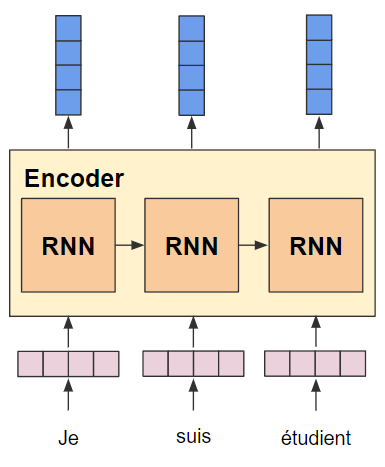

RNN은 **<font color='4682D4'>연산 결과</font>**를 출력하며 동시에 다음 시점(time step)의 RNN 셀에 그 결과를 넘겨주던 것을 기억하시나요?  
기존의 Seq2Seq는 가장 마지막 시점에서의 인코더의 연산값, 즉, **<font color='DAA520'>context vector</font>**만 디코더에서 이용하는데 어텐션은 각 시점마다 생성되는 **<font color='4682D4'>은닉 벡터(Hidden-state Vector)</font>**를 모두 이용하겠다는 의미입니다.

<br>그럼 계속해서 이 벡터들을 어떻게 이용하는지 계속해서 살펴보겠습니다!

#### **Query, Key, Value**

앞서 이야기한 **<font color='4682D4'>은닉 벡터(hidden-state vector)</font>**를 어떻게 이용한다는 걸까요?

<br>바로 Query와 Key, Value로써 이용합니다.  
> ❗ *Query, Key, Value를 이용한 아이디어는 Transformer에서도 계속됩니다! 이를 꼭 이해하고 가는 것을 추천드립니다!*

- **Query**는 '질문(하다)'라는 사전적 의미를 가지고 있습니다. 즉, 어떤 질문을 하겠다는 의미로 볼 수 있습니다.
- **Key, Value**는 우리가 사용하고 있는 파이썬 언어의 딕셔너리 자료형과 유사하다 볼 수 있습니다.  
Key를 이용해 Value를 호출하는 한 쌍의 구조를 가지고 있습니다.


<br> 이를 정리하면 다음과 같습니다.
- **Query** 번역할 문장과의 관계를 알고자하는 hidden-state vector, **'예측 시점에서의 디코더의 은닉 벡터'**
- **Key**는 Query와 어떤 관계가 있는지 살펴볼 때 이용할 hidden-state vector, **'모든 시점의 인코더의 은닉 벡터'**
- **Value**는 Query와 Key를 통해 나온 결과가 반영되는 hidden-state vector, **'모든 시점의 인코더의 은닉 벡터'**

<br> 예를 들어 'student'라는 단어를 번역할 시점이라면 아래의 이미지와 같이  
**Query**는 **<font color='DC143C'>디코더에서 해당 시점에 생성된 은닉 벡터</font>**, **Key**와 **Value**는 각각 **<font color='4682D4'>인코더에서 모든 시점에 생성된 은닉 벡터</font>**가 되는 것입니다.

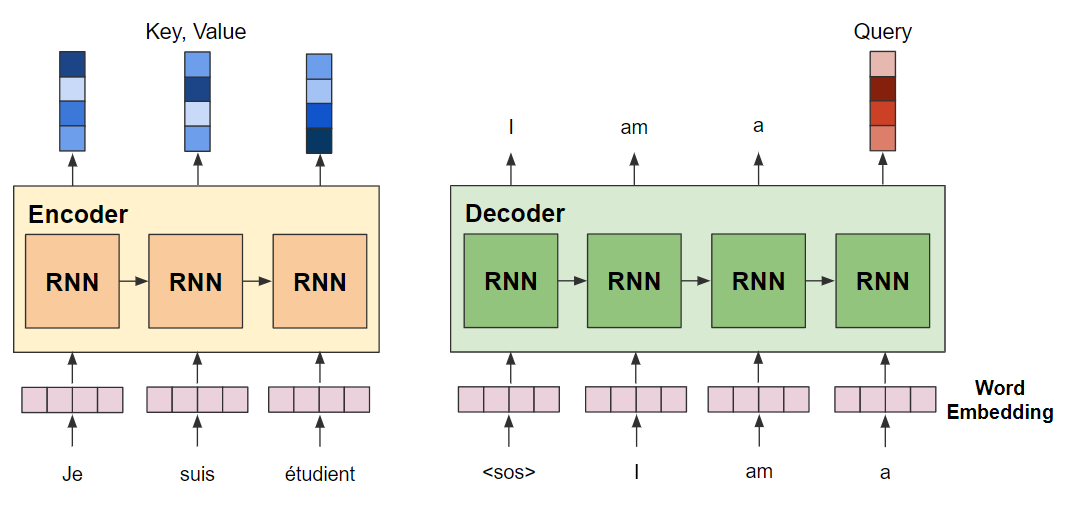

#### **Attention Mechanism의 연산 과정**

필요한 재료는 모두 마련되었습니다. 이제부터 어떻게 연산이 되는지 살펴보겠습니다.  

<br>아래는 Dot-Product Attention에 연산 과정을 담고 있습니다.  
사실 다양한 종류의 어텐션이 존재하지만, 연산 과정이 가장 단순한 Dot-Product Attention을 통해 어텐션에 대해 알아보겠습니다.  
다른 어텐션과의 차이는 대게 연산 중에 사소한 차이가 존재하며 이외 나머지는 대부분 유사합니다.

1. **Query 벡터와 각각의 Key 벡터를 내적합니다.**  
각 벡터간 유사도를 구하기위한 과정이며, 이 내적한 값들을 어텐션 스코어(Attention Score)라고도 부릅니다.  
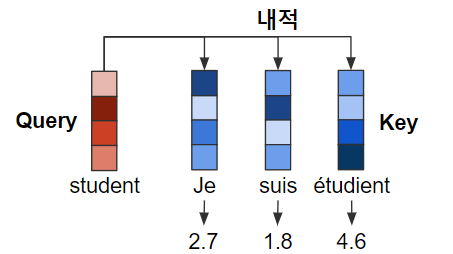
2. **어텐션 스코어에 소프트맥스(Softmax) 함수를 취해줍니다.**  
이 때, 소프트맥스를 취한 결과값을 어텐션 분포(Attention Distribution)라고도 부릅니다.  
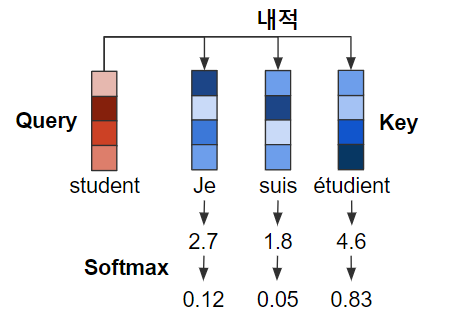

3. **어텐션 분포와 Value 벡터를 각각 곱하고 더해줍니다(=가중합).**  
  이 때, 이 결과값을 어텐션 값(Attention Value) 혹은 입력 시퀀스의 문맥을 담고 있어 앞서 Seq2Seq처럼 **문맥 벡터(Context Vector)**라고 부르며, 우리가 최종적으로 얻고자 하는 벡터입니다. 입력 시퀀스에 각 단어(토큰)의 정보를 내적을 통해 구해진 유사도만큼만 반영하며 Seq2Seq의 **<font color='DAA520'>context vector</font>**와 이름은 같지만 값은 다른 모습을 보이고 있습니다.  
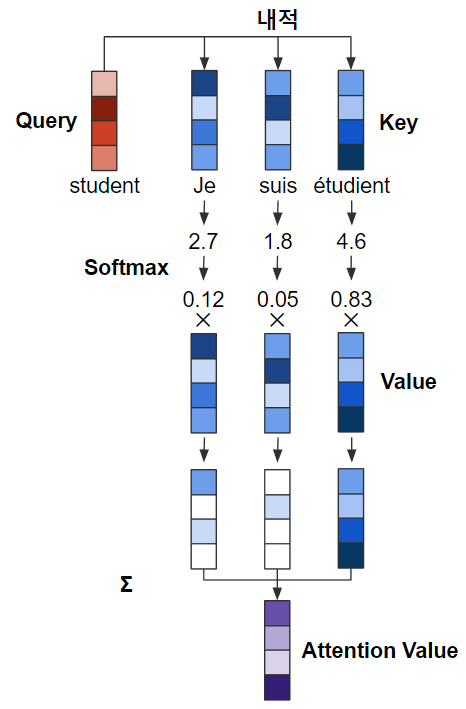

> ❓ *왜 어텐션 스코어를 바로 이용하지 않고 Softmax를 취해준 다음에 가중합을 진행할까요?*

이후에는 추가적인 몇 가지 작업을 더해 모델을 완성하게 됩니다.  
- 우선 어텐션 값을 이용하기 위해 **<font color='DC143C'>디코더의 은닉 벡터(쿼리)</font>**와 **이어붙여(Concat)**줍니다.  
이어붙여 만들어진 새로운 벡터는 디코더에서의 정보를 담고 있음과 동시에 인코더의 정보를 개별적으로 반영한 새로운 벡터가 됩니다.  
- 논문에서는 이 벡터를 출력층으로 바로 보내지 않고, 가중치 연산을 한 번 더 진행하고 활성화 함수로 tanh를 취해줍니다.  
- 그 다음 softmax 함수를 취해 최종적으로 어떤 단어가 올지 결정하게 됩니다.


#### **코드로 구현한 Attention Mechanism**

아래는 Seq2Seq with Attention Mechanism을 통해 불어를 영어로 번역하는 모델을 구현한 예제 코드입니다.  
> ❗ *지금 당장은 아래 코드를 전부 이해하지 못해도 좋습니다. class를 어떻게 구현하였는지 주목해주세요!*

필요한 라이브러리를 호출합니다.

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

데이터셋을 준비합니다. gui로 첨부 파일을 추가합니다. ([출처](http://www.manythings.org/anki/))  
다음으로 필요에 맞게 적절히 가공합니다.

In [2]:
file = open("fra.txt", 'r', encoding = "utf8")

raw_data = []

for line in file:
  pos = line.find("CC-BY")
  line = line[:pos-1]

  eng, fra = line.split('\t')
    
  data = eng, fra
  raw_data.append(data)
    
file.close()

def convert(list):

  return tuple(list) 
  
data = convert(raw_data)

유니코드를 아스키코드로 변환 후, 정규표현식을 이용해 전처리를 진행하는 함수를 정의합니다.

In [3]:
def unicode_to_ascii(s):
  
  return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def preprocess_sentence(s):
  s = unicode_to_ascii(s.lower())
  s = re.sub(r'([!.?])', r' \1', s)
  s = re.sub(r'[^a-zA-Z.!?]+', r' ', s)
  s = re.sub(r'\s+', r' ', s)

  s = s.strip()
  s = '<start>' +' '+ s +' '+' <end>'

  return s

데이터가 매우 크기 때문에(약 200,000개) 30,000만 사용하겠습니다.  
이후에 토큰화를 진행 후 리스트에 넣어주겠습니다.

In [4]:
data = data[:30000]

lang_eng = []
lang_fra = []

raw_data_en, raw_data_fra = list(zip(*data))
raw_data_en, raw_data_fra = list(raw_data_en), list(raw_data_fra)

for i, j in zip(raw_data_en, raw_data_fra):
  preprocessed_data_en = preprocess_sentence(i)
  preprocessed_data_fra = preprocess_sentence(j)
  lang_eng.append(preprocessed_data_en)
  lang_fra.append(preprocessed_data_fra)

def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, 
                                                         padding='post')

  return tensor, lang_tokenizer

input_tensor, inp_lang = tokenize(lang_fra)
target_tensor, targ_lang = tokenize(lang_eng)

max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

학습 데이터와 검증 데이터로 나눈 후, 크기를 확인해보겠습니다.  
이후에 단어를 인덱스에 매핑합니다.

In [5]:
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

def convert(lang, tensor):
  for t in tensor:
    if t != 0:
      print("%d ----> %s" % (t, lang.index_word[t]))

print("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[0])

print("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[0])

24000 24000 6000 6000
Input Language; index to word mapping
1 ----> <start>
48 ----> qui
3233 ----> paiera
6 ----> ?
2 ----> <end>
Target Language; index to word mapping
1 ----> <start>
52 ----> who
75 ----> will
216 ----> pay
6 ----> ?
2 ----> <end>


훈련에 필요한 파라미터를 정의합니다.

In [6]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE

vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 17), dtype=tf.int32, name=None), TensorSpec(shape=(64, 9), dtype=tf.int32, name=None))>

인코더를 정의합니다. 정의하며 반환할 값과 초기 모양을 잡아줍니다.

In [30]:
class Encoder(tf.keras.Model):

    def __init__(self, inp_vocab_size, embedding_size, lstm_size, input_length):
        super(Encoder, self).__init__()
        
        self.lstm_size = lstm_size
        self.embedding = tf.keras.layers.Embedding(inp_vocab_size, embedding_size)
        self.lstm = tf.keras.layers.LSTM(lstm_size, return_sequences=True, return_state=True)

    def call(self, input_sequence, states):
      
        embed = self.embedding(input_sequence)
        output, state_h, state_c = self.lstm(embed, initial_state=states)

        return output, state_h, state_c
    
    def initialize_states(self,batch_size):
    
        return (tf.zeros([batch_size, self.lstm_size]),
                tf.zeros([batch_size, self.lstm_size]))

어텐션 매커니즘을 정의합니다.

In [31]:
class Attention(tf.keras.layers.Layer):
    def __init__(self,scoring_function, att_units):
        super(Attention, self).__init__()
        
        self.scoring_function = scoring_function
        self.att_units = att_units

        if self.scoring_function=='dot':
            pass

    def call(self,decoder_hidden_state,encoder_output):

        if self.scoring_function == 'dot':
            
            new_state = tf.expand_dims(decoder_hidden_state, -1)
            score = tf.matmul(encoder_output, new_state)
            weights = tf.nn.softmax(score, axis=1)
            context = weights * encoder_output
            context_vector = tf.reduce_sum(context, axis=1)
                                
            return context_vector, weights

디코더를 사용하기에 앞서 기존의 임베딩, LSTM을 초기화합니다.

In [32]:
class One_Step_Decoder(tf.keras.Model):
    def __init__(self, tar_vocab_size, embedding_dim, input_length, dec_units, score_fun, att_units):
        super(One_Step_Decoder, self).__init__()
        self.tar_vocab_size = tar_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.dec_units = dec_units
        self.score_fun = score_fun
        self.att_units = att_units
        self.embedding = tf.keras.layers.Embedding(self.tar_vocab_size, self.embedding_dim, 
                                                   input_length=self.input_length)
        
        self.lstm = tf.keras.layers.LSTM(self.dec_units, return_sequences=True, 
                                         return_state=True)
        
        self.output_layer = tf.keras.layers.Dense(self.tar_vocab_size)
        
        self.attention = Attention(self.score_fun, self.att_units)

    def call(self, input_to_decoder, encoder_output, state_h, state_c):
        
        result = self.embedding(input_to_decoder)
        
        context_vector, weights = self.attention(state_h, encoder_output)
        
        concat = tf.concat([tf.expand_dims(context_vector, 1), result], axis=-1)
        
        decoder_output, hidden_state, cell_state = self.lstm(concat, initial_state=[state_h, state_c])
        
        final_output = tf.reshape(decoder_output, (-1, decoder_output.shape[2]))
        final_output = self.output_layer(final_output)
        
        return final_output, hidden_state, cell_state, weights, context_vector

디코더를 정의합니다.  
각 시점의 출력을 저장할 TensorArray를 만들고 디코더의 입력 길이만큼 연산을 반복합니다.

In [33]:
class Decoder(tf.keras.Model):
    def __init__(self, out_vocab_size, embedding_dim, output_length, dec_units ,score_fun ,att_units):
        super(Decoder, self).__init__()
        self.out_vocab_size = out_vocab_size
        self.embedding_dim = embedding_dim
        self.output_length = output_length
        self.dec_units = dec_units
        self.score_fun = score_fun
        self.att_units = att_units
        self.onestepdecoder = One_Step_Decoder(self.out_vocab_size, self.embedding_dim, self.output_length,
                                               self.dec_units, self.score_fun, self.att_units)
        
    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state):
        
        all_outputs= tf.TensorArray(tf.float32, size=input_to_decoder.shape[1], name="output_arrays")
        
        
        for timestep in range(input_to_decoder.shape[1]):
            output, decoder_hidden_state, decoder_cell_state, weights, context_vector = self.onestepdecoder(input_to_decoder[:,timestep:timestep+1],                                                                                     
                                                                                                            encoder_output, 
                                                                                                            decoder_hidden_state,
                                                                                                            decoder_cell_state)
            
            all_outputs = all_outputs.write(timestep, output)
        
        all_outputs = tf.transpose(all_outputs.stack(), (1, 0, 2)) 

        return all_outputs

인코더와 디코더를 결합합니다.

In [34]:
class encoder_decoder(tf.keras.Model):
    def __init__(self, inp_vocab_size, out_vocab_size, embedding_size, lstm_size, 
                 input_length, output_length, dec_units ,score_fun ,att_units, batch_size):
        
        super(encoder_decoder, self).__init__()
        
        self.encoder = Encoder(inp_vocab_size, embedding_size, lstm_size, input_length)
        self.decoder = Decoder(out_vocab_size, embedding_size, output_length, 
                               dec_units, score_fun, att_units)
    
    def call(self, data):
        
        input_sequence, input_to_decoder = data[0],data[1]
        initial_state = self.encoder.initialize_states(batch_size=64)
        encoder_output, state_h, state_c = self.encoder(input_sequence, initial_state)
        decoder_hidden_state = state_h
        decoder_cell_state = state_c
        decoder_output = self.decoder(input_to_decoder, encoder_output, decoder_hidden_state, decoder_cell_state)
        
        return decoder_output

손실 함수를 정의합니다.

In [35]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

optimizer = tf.keras.optimizers.Adam()

모델을 구축합니다.

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("dot.h5", monitor='val_loss', verbose=1, save_weights_only=True)

logdir='logs'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

input_vocab_size = len(inp_lang.word_index)+1
output_vocab_size = len(targ_lang.word_index)+1

input_len = max_length_inp
output_len = max_length_targ

lstm_size = 128
att_units = 256
dec_units = 128
embedding_size = 300
embedding_dim = 300
score_fun = 'dot'
steps = len(input_tensor)//64
batch_size=64

model = encoder_decoder(input_vocab_size, output_vocab_size, embedding_size, lstm_size, input_len, output_len, dec_units, score_fun, att_units, batch_size)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer, 
                                 encoder=model.layers[0],
                                 decoder=model.layers[1]
                                 )

훈련 루프를 지정합니다.  

In [37]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden,enc_state = model.layers[0](inp, enc_hidden)


    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1) # teacher forcing

    for t in range(1, targ.shape[1]):
      predictions = model.layers[1](dec_input, enc_output, enc_hidden, enc_state)

      loss += loss_function(targ[:, t], predictions)

      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = model.layers[0].trainable_variables + model.layers[1].trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

모델을 학습합니다.

In [38]:
EPOCHS = 20

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = model.layers[0].initialize_states(64)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
      
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 5.2237
Epoch 1 Batch 100 Loss 2.9515
Epoch 1 Batch 200 Loss 2.9027
Epoch 1 Batch 300 Loss 2.3822
Epoch 1 Loss 2.8538
Time taken for 1 epoch 22.733107328414917 sec

Epoch 2 Batch 0 Loss 2.2055
Epoch 2 Batch 100 Loss 2.1528
Epoch 2 Batch 200 Loss 2.1462
Epoch 2 Batch 300 Loss 2.1637
Epoch 2 Loss 2.1569
Time taken for 1 epoch 8.947769165039062 sec

Epoch 3 Batch 0 Loss 2.0150
Epoch 3 Batch 100 Loss 2.0436
Epoch 3 Batch 200 Loss 1.9514
Epoch 3 Batch 300 Loss 1.9236
Epoch 3 Loss 1.9824
Time taken for 1 epoch 7.740170478820801 sec

Epoch 4 Batch 0 Loss 1.8998
Epoch 4 Batch 100 Loss 1.8277
Epoch 4 Batch 200 Loss 1.8456
Epoch 4 Batch 300 Loss 1.8633
Epoch 4 Loss 1.7938
Time taken for 1 epoch 7.7033445835113525 sec

Epoch 5 Batch 0 Loss 1.7362
Epoch 5 Batch 100 Loss 1.6143
Epoch 5 Batch 200 Loss 1.4751
Epoch 5 Batch 300 Loss 1.6198
Epoch 5 Loss 1.5749
Time taken for 1 epoch 7.019506931304932 sec

Epoch 6 Batch 0 Loss 1.4697
Epoch 6 Batch 100 Loss 1.4713
Epoch 6 Batch 200 Lo

예측값을 반환하고 출력값이 벡터이기 때문에 예측 텍스트를 반환합니다.

In [39]:
def predict(input_sentence):

  attention_plot = np.zeros((output_len, input_len))

  input_sentence = preprocess_sentence(input_sentence)

  inputs = [inp_lang.word_index[i] for i in input_sentence.split()]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=input_len,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''
  
  encoder_output, state_h, state_c = model.layers[0](inputs,[tf.zeros((1, lstm_size)),tf.zeros((1, lstm_size))])

  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(output_len):
   predictions,state_h,state_c,attention_weights,context_vector = model.layers[1].onestepdecoder(dec_input,
                                                                                                 encoder_output,
                                                                                                 state_h,
                                                                                                 state_c)

   attention_weights = tf.reshape(attention_weights, (-1, ))
   attention_plot[t] = attention_weights.numpy()

   predicted_id = tf.argmax(predictions[0]).numpy()

   result += targ_lang.index_word[predicted_id] + ' '

   if targ_lang.index_word[predicted_id] == '<end>':
     return result, input_sentence, attention_plot

   dec_input = tf.expand_dims([predicted_id], 0)

  return result, input_sentence, attention_plot

In [40]:
def translate(sentence):
  result, sent, attention_plot = predict(sentence)

  print('Input: %s' % (sent))
  print('Predicted translation: {}'.format(result))

In [41]:
translate(u'Je suis étudiant')

Input: <start> je suis etudiant  <end>
Predicted translation: am a student . <end> 


## ***2. Transformer(Attention Is All You Need)***

---

여러분은 트랜스포머(Transformer)하면 무엇이 떠오르나요? 변신 로봇? 변압기?  
**트랜스포머(Transformer)**는 2017년 구글에서 발표한 [Attention is All You Need](https://arxiv.org/abs/1706.03762)라는 논문에서 제안된 모델입니다.  

<br>논문의 제목에서 알 수 있듯 **Attention**에만 주목하여 모델을 구축했는데요. RNN을 사용하지 않으면서 어떤 일이 일어났을까요?

**RNN은** 데이터를 순차적으로 처리하는 그 구조상 **병렬화가 어렵다**는 단점이 있던 것을 기억하시나요?  
근본적으로 RNN을 사용하지 않아 기존 RNN 기반의 언어 모델이 갖고 있던 병렬화가 불가하다는 단점을 극복했습니다.  
병렬화가 가능하다는 말은 GPU를 이용한 연산에도 최적화되어 있단 말이겠죠?  

병렬 연산에도 최적화되어 있는데, 인코더-디코더의 구조와 Attention 매커니즘만 사용해 구조가 상대적으로 단순합니다.  
병렬화로 처리 속도가 빠른데 성능은 우수해 최근에는 컴퓨터 비전, 정형 데이터 처리같은 다른 Task에서도 사용 시도가 이루어지고 있습니다.  
Attention is All You Need 논문은 현재 50,000번 넘게 인용되었습니다. 정말 다양한 방면으로 응용되고 있다는 말이겠죠? 

<br>**참고 기사**
- [네이버, '초거대 AI 하이퍼클로바' 일상 서비스 곳곳 접목](https://biz.newdaily.co.kr/site/data/html/2022/06/13/2022061300060.html)
- [엔비디아, 아스트라제네카와 AI 연구 프로젝트 진행](https://www.epnc.co.kr/news/articleView.html?idxno=205933)  
- [오픈AI, 앤드류 응도 놀란 DALL·E 공개...GPT-3 원리로 획기적인 이미지 제작 혁신](http://www.aitimes.com/news/articleView.html?idxno=135460)

<br>트랜스포머와 관련된 기사를 몇 개 가져와 보았습니다.  
자연어 처리 뿐만 아니라, 화학 분야에서도, 이미지 생성에서도 트랜스포머가 이용되고 있는 모습을 볼 수 있습니다.  
바야흐로 트랜스포머의 시대에 살고 있다고해도 과언이 아닌데요. 알아보지 않을 수가 없겠죠?  
논문에서 제안한 트랜스포머 그대로 가장 기본적인 구조로 차근차근 알아보도록 하겠습니다.

### **Transformer의 구조**

아래는 트랜스포머 모델의 전체 모양을 간단히 도식화한 이미지입니다.  
기존 Seq2Seq의 Encoder-Decoder 구조를 사용하는데요. 차이점은 인코더와 디코더를 여러 개 사용한다는 것입니다.  
이때 각각의 박스로 표현된 인코더, 디코더를 '블록'이라 부릅니다.

인코더와 디코더 블록을 겹겹이 쌓아 성능을 높여주는데요. 논문에서는 각 블록을 6개씩 사용하였습니다.

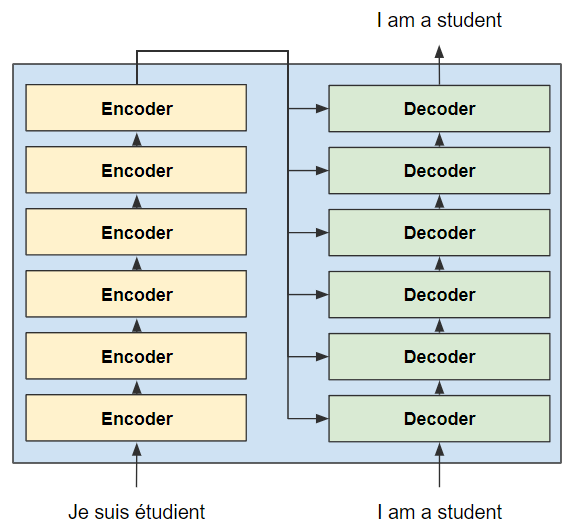

아래의 이미지에서 모델의 구조에 대해 조금 더 자세히 살펴볼까요?

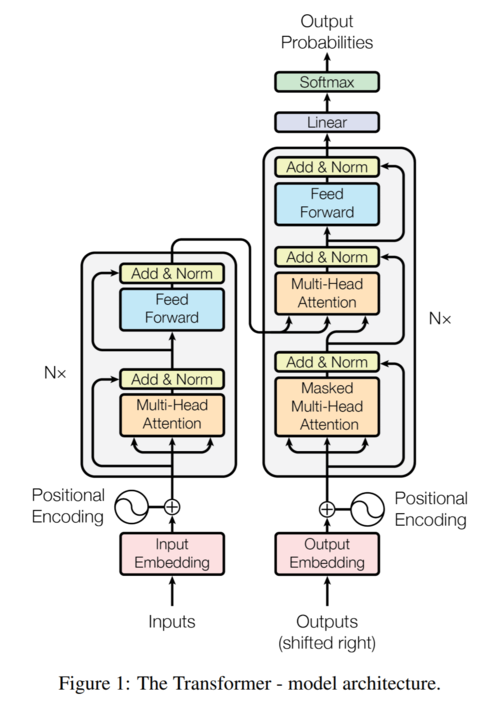

조금 더 자세히 살펴보니 구조가 굉장히 복잡해 보입니다.  
하지만 여러분들이 이전에 학습했던 내용들이 포함되어 있기 때문에 몇 가지만 더 살펴보면 됩니다.

1. Positional Encoding
2. Multi-Head Attention
3. Add & Norm
4. Masked Multi-Head Attention

이외에는 위에 나열한 내용들에 대해 알아갈 때, 같이 간단히 살펴보며 넘어가겠습니다!

#### **1. Positional Encoding**

RNN는 입력 데이터의 순서에 맞춰 순차적으로 처리한다는 것을 기억하시나요?  
때문에 자연어 처리에서는 RNN을 사용하는 것이 유용했습니다. 하지만 트랜스포머는 RNN을 사용하지 않습니다.   
RNN을 사용하지 않아서 입력 시퀀스 내 위치 정보(position information), 다시 말해 문장 내 각 단어들의 순서를 알 수 없습니다.  
그렇기 때문에 위치 정보를 더해주기 위해 사용하는 것이 **Positional Encoding**이고 아래의 함수를 이용합니다.  

<br>$PE_{pos, 2i} = sin(pos/10,000^{2i/d_{model}})$  
$PE_{pos, 2i+1} = cos(pos/10,000^{2i/d_{model}})$

함수를 살펴보면 $sin, cos$ 함수이며, 파동과 같은 모양을 갖습니다.  
함수 내 변수 $pos$는 임베딩 벡터의 위치, $i$는 임베딩 벡터 내의 차원의 인덱스, $d_{model}$은 임베딩 벡터의 길이(=차원)를 의미합니다.

정리해보자면 벡터 내의 각 차원의 인덱스가 홀수일 때는 $cos$값을, 짝수일때는 $sin$값을 이용합니다.  
아래는 **Positional Encoding** 과정과 결과에 대한 이미지입니다.  
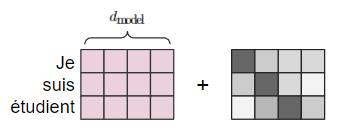  
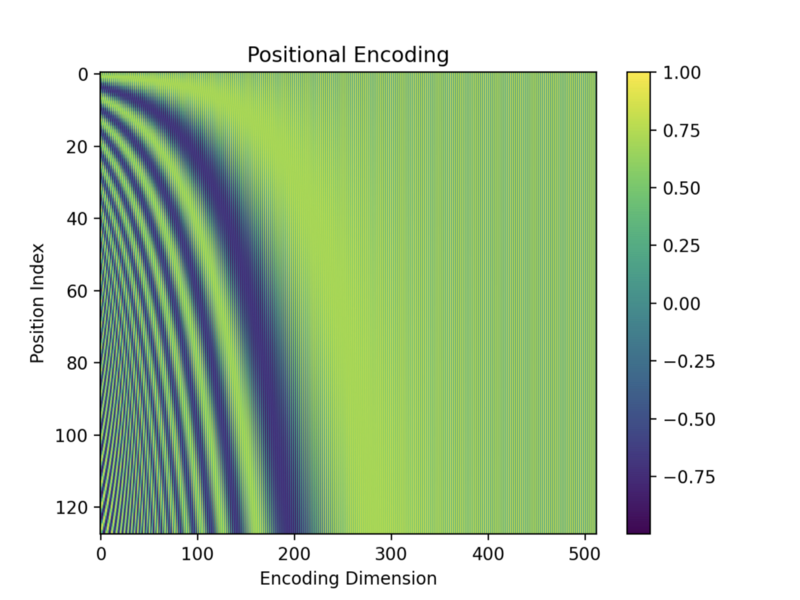  

<br>트랜스포머의 연산은 위와 같이 **<font color='magenta'>임베딩 벡터</font>**를 이어붙인 행렬의 형태로 연산되는데, 위치 정보를 넣어준다는 것은 행렬의 덧셈으로 이루어집니다.  
행렬의 형태로 연산이 진행되는 것은 Multi-Head Attention에서 더 자세히 살펴보겠습니다.  

<br>위와 같은 방식으로 위치 정보를 넣어주면 순서가 보존됩니다. 또한 같은 단어라도 위치 정보에 따라 임베딩 벡터의 값이 달라집니다.
> ❓ *위치 정보는 왜 ```[1, 2, 3, ...]```과 같이 숫자로 넣어주지 않고, 이렇게 복잡한 방법으로 넣어주게 될까요?*

#### **2. Multi-Head Attention(Encoder)**

위치 정보를 더한 임베딩 벡터가 인코더 블럭에 들어왔습니다. 인코더 블럭에서는 어떤 일이 일어나게 될까요?  
바로 **Self-Attention** 연산을 해주게 됩니다. Self-Attention은 무엇이며, 왜 해주게 되는걸까요?
> ❗ *트랜스포머가 어렵다면 이번 시간에는 Self-Attention만은 꼭 이해하고 가셨으면 좋겠습니다!*

***The animal didn't cross the street because it was too tired.*** 라는 문장이 있다고 가정해보겠습니다.  
<br>사람은 문장 내 *'it'*이 *'animal'*을 지칭하는 것을 바로 알 수 있습니다. 하지만 컴퓨터는 이를 알 수 있을까요?  
번역 성능을 높이기 위해선 *'It'*이 *'animal'*을 지칭한다는 것을 꼭 알아야겠죠?  이를 컴퓨터에게 알려주기 위해 사용합니다.

<br>아래는 Self-Attention을 통해 *'It'*이 어느 단어와 연관이 있는지 시각화한 이미지입니다.  
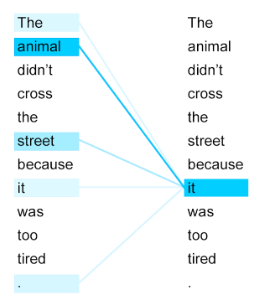

Self-Attention 매커니즘은 어떤 과정을 통해 연산이 될까요?  
Attention의 한 종류이기 때문에 앞서 살펴보았던 **Query**, **Key**, **Value**의 아이디어가 이용됩니다.

1. **문장 내 각 단어에 대한 Query, Key, Value를 생성합니다.**  
이를 위해 인코더 블록에는 **가중치 행렬** $W_{Query}$, $W_{Key}$, $W_{Value}$를 생성합니다.  
행렬의 차원은 $num\_heads$라는 하이퍼파라미터와 $d_{model}$을 나눈 값이 되며, 논문과 동일하게 $d_{model}$ = 512, $num\_heads$ = 8로 설정하면 가중치 행렬의 차원은 64가 됩니다. 이미지에서는 공간의 한계로 3칸으로 표현되어 있습니다.  
$num\_heads$에 대해서는 아래에서 더 자세히 살펴보겠습니다.  
각각의 가중치행렬과 **<font color='magenta'>위치 정보가 더해진 임베딩 벡터</font>**를 곱해줍니다.  
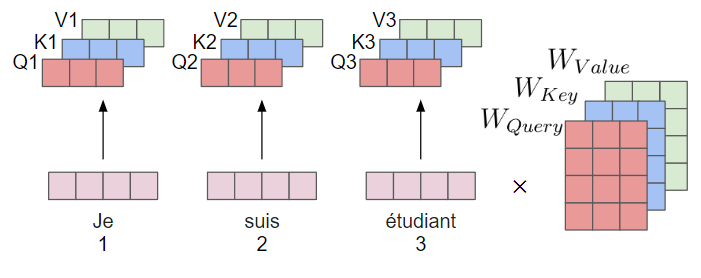  
> ❗ *여기서 중요한 점은 $W_{Query}$, $W_{Key}$, $W_{Value}$가 우리가 모델을 통해서 학습할 **가중치**라는 점입니다. 꼭 기억해주세요!*

2. **첫번째 단어와 나머지 단어와의 유사도를 알아보겠습니다.**  
첫번째 단어 쿼리와 나머지 단어의 키를 내적합니다.  
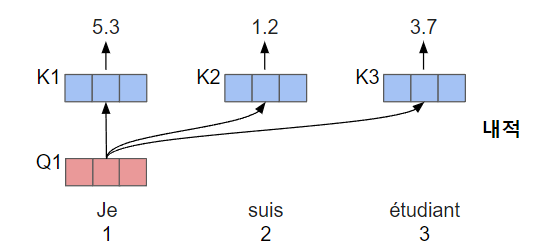

3. **어텐션 스코어를 $\sqrt{d_k}$로 나누어주고 Softmax를 취해줍니다.**  
트랜스포머에서 이용하는 어텐션은 **Scaled dot-product Attention**입니다.  
앞서 살펴본 Dot-product Attention에서 값을 스케일링하는 과정(= $\sqrt{d_k}$로 나누는 과정)을 추가해줍니다.  

  $d_k$는 $d_{model}/num\_heads$이므로 8이 됩니다.  
$num\_heads$는 하이퍼파라미터입니다. 조금 뒤에서 자세하게 한 번 더 알아보겠습니다.  
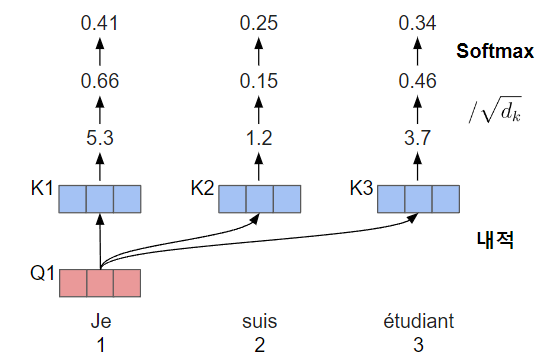  
> ❓ *동일한 단어에 대한 Query와 Key를 내적했는데, 왜 Softmax 값이 1이 아닐까요?*

4. **Softmax를 취해준 값과 Value 벡터를 각각 곱한 다음, 모두 더해(=가중합) 어텐션 값을 만듭니다.**  
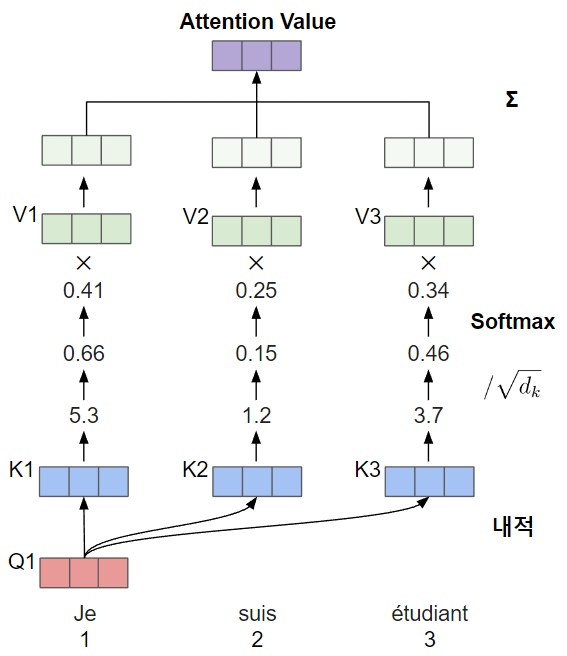  

이렇게 Self-Attention이 진행 되는데요.  
실제 트랜스포머는 행렬 단위로 연산이 진행되게 됩니다.  
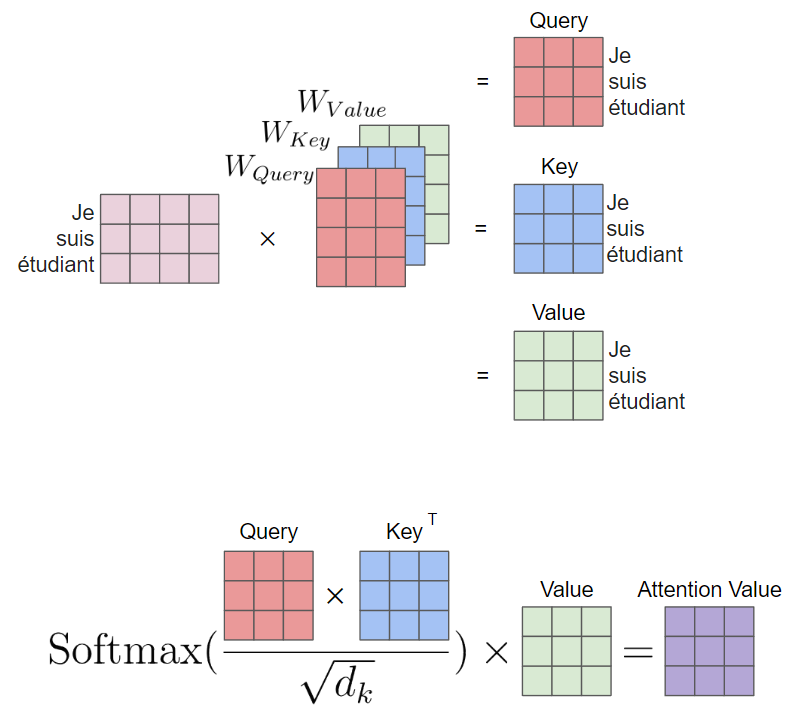

Multi-Head Attention(Encoder)에서 Self-Attention에 대해서 알아보았습니다. 그런데 왜 이름은 Multi-Head Attention일까요?  

<br>Multi-Head Attention에서는 Self-Attention이 동시에 여러번 일어나게 됩니다.  
각 head마다 각기 다른 $W_{Query}$, $W_{Key}$, $W_{Value}$을 가지기 때문에 각기 다른 결과값을 만들고,     
이를 **이어붙여** 만든 $d_{model}$과 같은 길이의 행렬과 또 다른 가중치 행렬 $W^{o}$와의 연산을 통해 최종 결과 $Z$를 얻게 되며,  
$Z$의 크기는 입력되는 행렬의 크기(단어의 개수, $d_{model}$)와 동일합니다.
> ❗ *$W^{o}$도 우리가 모델을 통해 학습해야할 **가중치**입니다.*

<br>앞서 가중치 행렬의 차원을 구할 때와 스케일링을 위한 $\sqrt{d_k}$를 구할 때 설정한 하이퍼파라미터 $num\_heads$가 head의 개수를 의미하게 됩니다.  
$num\_heads$ = 8로 설정했으니 head는 8개가 됩니다.  
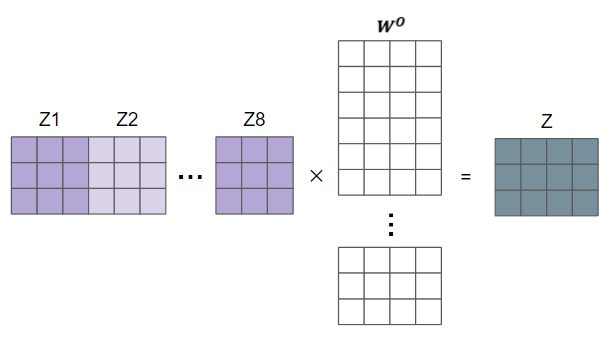

#### **3. Add & Norm**

트랜스포머의 서브층에서 나오는 모든 결과값은 **Residual Connection**과 **Layer Normalization**을 거치게 됩니다.  
둘 다 학습을 돕는 보조 역할을 하는 기법이기 때문에 간단하게 살펴보고 넘어가겠습니다.
1. **Residual Connection**  
기울기의 소실을 방지하기 위해 사용되며 잔차 학습이라고도 부릅니다.  
신경망 연산을 통해 궁극적으로 얻고자하는 값이 함수 $H(x)$라고 했을 때,  
이 $H(x)$를 바로 구하는 것보다 입력값 $x$와 출력값 $F(x)$를 더해 만드는 것이 더 쉽다는 아이디어입니다.  
즉, $H(x)=F(x)+x$가 되며 역전파 과정에서 미분했을 때, 무조건 1 이상이 되기 때문에 기울기 소실을 방지할 수 있습니다.  
서브층의 입력 벡터와 출력 벡터는 크기가 같기 때문에, 행렬의 덧셈이 진행되게 됩니다.  
  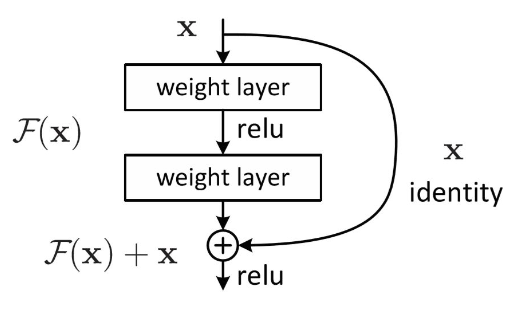

2. **Layer Normalization**
Batch Normalization과 사용 목적이 유사합니다. 학습이 더욱 빠르고 잘 이루어지게 만들기 위해 사용합니다.  
다만, 차이점이 존재합니다.  
  - Batch Normalization은 모든 샘플 내의 각 feature들의 평균과 분산을 구해 정규화를 진행합니다.
  - Layer Normalization은 각 샘플의 평균과 분산을 구해 정규화를 진행합니다.  

  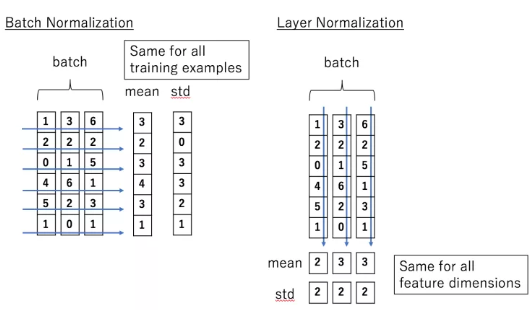

#### **4. Masked Multi-Head Attention**

이제 디코더에서는 어떤 일이 일어나는지 확인 해보겠습니다.  

<br>디코더도 **인코더와 동일하게 위치 정보가 더해진 임베딩 벡터를 입력 받고 Self-Attention을 이용한 Multi-Head Attention을 수행**하게 됩니다.  
그런데 서브층의 이름에 **'Masked'**라고 붙습니다. 분명 마스킹을 해준다는 의미일텐데, 무엇을 마스킹해주게 될까요?  

<br>앞서 언급했듯 트랜스포머는 입력 시퀀스를 한꺼번에 입력받습니다.  
즉, 시퀀스 내 단어를 순차적으로 입력받는 Seq2Seq와 다르게 디코더에 번역된 문장을 한꺼번에 입력받기 때문에 특정 시점의 단어를 예측할 때, 미래 시점의 단어를 이용할 수 있습니다. 일종의 치팅(cheating)이 일어난다 볼 수 있습니다.  
이러한 문제를 방지하고자 예측 시점 이후의 단어들을 마스킹해주게 됩니다.  
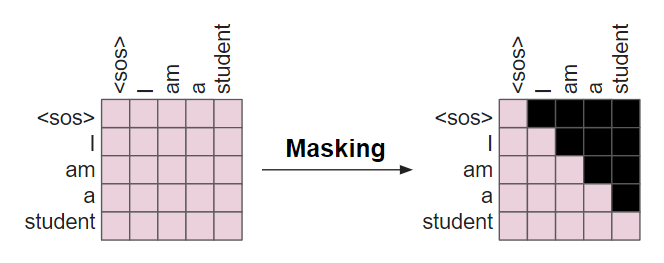

<br>마스킹은 Self-Attention 과정 중 Softmax를 취해주기 전에 $-\infty$(혹은 이에 준하는 값)를 더해주어 진행됩니다.  
이후에 Softmax를 취해주면 마스킹한 값은 모두 0이 됩니다.  

<br>아래는 'am'을 예측할 시점일 때를 도식화한 이미지입니다.  
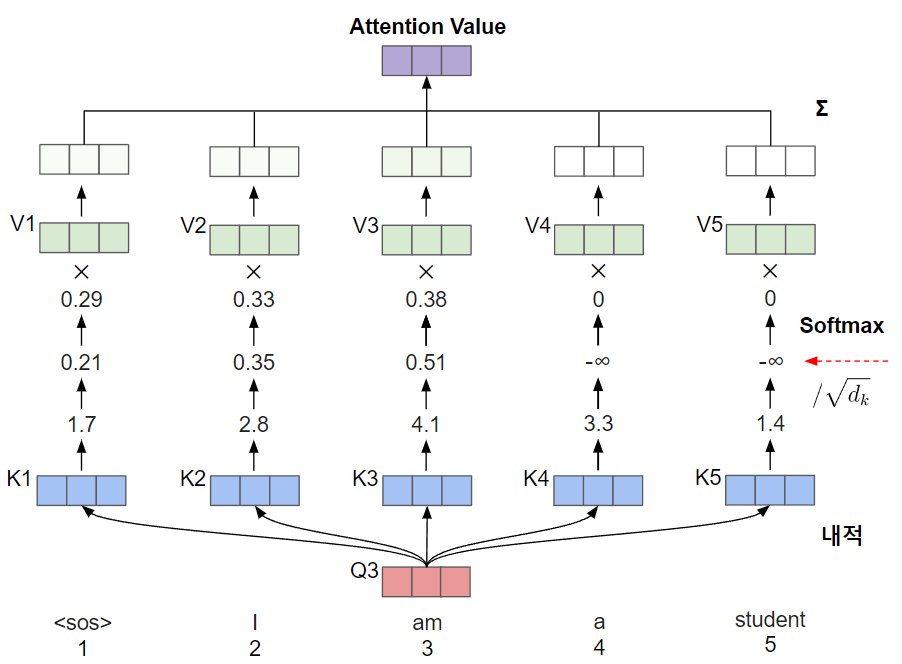

#### **5. Multi-Head Attention(Decoder)**

다음은 디코더 블록의 두 번째 서브층입니다.  
더 나은 번역 성능을 위해서는 **'번역할 문장'**과 **'번역된 문장'**과의 관계도 중요하기 때문에 이 둘을 이용해 Attention을 진행해주게 됩니다.  
- Query는 **'디코더의 첫번째 서브층에서 연산된 최종 결과값'**
- Key, Value는 **'모든 인코더 블록을 거쳐 연산된 최종 결과값'**

이렇게 Query, Key, Value가 달라지는 것을 제외한 다른 과정은 모두 Self-Attetion과 동일합니다.

###**Transformer 코드 실습**

[KerasNLP](https://keras.io/keras_nlp/)를 이용한 영어를 스페인어로 번역하는 예제를 통해 트랜스포머를 구현해보도록 하겠습니다.  

<br>KerasNLP는 Python 3.7 이상, TensorFlow 2.9 이상을 요구합니다.  
Colab의 Tensorflow는 default 버전이 2.8.2이기 때문에 버전 업을 진행하고, KerasNLP도 최신 버전으로 설치해주겠습니다.  
앞서 tensorflow 라이브러리를 이미 호출했기 때문에 런타임을 다시 연결합시다.

> ❗ *모든 코드를 이해하지 못해도 좋습니다. 하지만 모델을 구축하는 코드는 꼭 살펴보고 넘어가셨으면 좋겠습니다.* 

In [ ]:
!pip install tensorflow==2.9.0
!pip install keras-nlp --upgrade

파이프라인 구축에 필요한 라이브러리를 호출하고 파라미터와 하이퍼파라미터들을 미리 정의하겠습니다.

In [ ]:
import keras_nlp
import numpy as np
import pathlib
import random
import tensorflow as tf

from tensorflow import keras
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

In [ ]:
BATCH_SIZE = 64
EPOCHS = 1  # epoch를 최소 10 번이상 돌려야 모델이 수렴합니다.
MAX_SEQUENCE_LENGTH = 40
ENG_VOCAB_SIZE = 15000
SPA_VOCAB_SIZE = 15000

EMBED_DIM = 256
INTERMEDIATE_DIM = 2048
NUM_HEADS = 8

데이터를 다운로드하고 압축을 해제합니다.  
그 다음, 데이터를 파싱하고 소문자로 변환 후, 데이터가 어떻게 구성되어 있는지 직접 확인해보겠습니다.

In [ ]:
text_file = keras.utils.get_file(fname="spa-eng.zip", 
                                 origin="http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip",
                                 extract=True,
                                 )

text_file = pathlib.Path(text_file).parent / "spa-eng" / "spa.txt"

In [ ]:
with open(text_file) as f:
    lines = f.read().split("\n")[:-1]

text_pairs = []
for line in lines:
    eng, spa = line.split("\t")
    eng = eng.lower()
    spa = spa.lower()
    text_pairs.append((eng, spa))

In [ ]:
for _ in range(5):
    print(random.choice(text_pairs))

데이터를 훈련/검증/테스트 셋으로 분할합니다.

In [ ]:
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples : num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples :]

print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")
print(f"{len(test_pairs)} test pairs")

토크나이저를 정의하기 전에 가지고 있는 데이터로 훈련시켜주기 위한 함수입니다.  
우리가 사용할 WordPieceTokenizer는 Subword Tokenizer로 문자 단위 토크나이저와 단어 단위 토크나이저 사이의 절충안입니다.  
TesorFlow Text를 이용한 WordPieceTokenizer에 대한 사용법은 [링크](https://www.tensorflow.org/text/guide/subwords_tokenizer)에서 확인할 수 있습니다.

In [ ]:
def train_word_piece(text_samples, vocab_size, reserved_tokens):
    bert_vocab_args = dict(vocab_size=vocab_size, # vocabulary size를 지정합니다.
                           reserved_tokens=reserved_tokens, # [PAD], [UNK], [START], [END]도 vocabulary에 추가합니다.
                           bert_tokenizer_params={"lower_case": True}, # `text.BertTokenizer`의 인자입니다.
                           )

    word_piece_ds = tf.data.Dataset.from_tensor_slices(text_samples)
    vocab = bert_vocab.bert_vocab_from_dataset(word_piece_ds.batch(1000).prefetch(2), **bert_vocab_args)
    
    return vocab

패딩 토큰, 알 수 없는 토큰, sos와 eos를 지정해주고, 토크나이저를 구성해줍니다.

In [ ]:
reserved_tokens = ["[PAD]", "[UNK]", "[START]", "[END]"]

eng_samples = [text_pair[0] for text_pair in train_pairs]
eng_vocab = train_word_piece(eng_samples, ENG_VOCAB_SIZE, reserved_tokens)

spa_samples = [text_pair[1] for text_pair in train_pairs]
spa_vocab = train_word_piece(spa_samples, SPA_VOCAB_SIZE, reserved_tokens)

In [ ]:
eng_tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=eng_vocab, lowercase=False
)
spa_tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=spa_vocab, lowercase=False
)

토큰화가 잘 되었는지 확인해봅니다.

In [ ]:
eng_input_ex = text_pairs[0][0]
eng_tokens_ex = eng_tokenizer.tokenize(eng_input_ex)

print("English sentence: ", eng_input_ex)
print("Tokens: ", eng_tokens_ex)
print("Recovered text after detokenizing: ", eng_tokenizer.detokenize(eng_tokens_ex))

spa_input_ex = text_pairs[0][1]
spa_tokens_ex = spa_tokenizer.tokenize(spa_input_ex)

print("Spanish sentence: ", spa_input_ex)
print("Tokens: ", spa_tokens_ex)
print("Recovered text after detokenizing: ", spa_tokenizer.detokenize(spa_tokens_ex))

데이터 형식을 지정하고, 데이터셋을 구성합니다.  
논문에서는 디코더에서 마스킹을 했지만 코드는 번역된 문장의 0부터 N번째 단어만 이용해 N+1번째 단어를 예측하는 방식으로 구현하겠습니다.

In [ ]:
def preprocess_batch(eng, spa):
    batch_size = tf.shape(spa)[0]

    eng = eng_tokenizer(eng)
    spa = spa_tokenizer(spa)

   
    eng_start_end_packer = keras_nlp.layers.StartEndPacker(sequence_length=MAX_SEQUENCE_LENGTH, 
                                                           pad_value=eng_tokenizer.token_to_id("[PAD]"), 
                                                           )  # 패딩처리 된 부분을 패딩 토큰으로 바꾸어 줍니다.
    eng = eng_start_end_packer(eng)

    
    spa_start_end_packer = keras_nlp.layers.StartEndPacker(sequence_length=MAX_SEQUENCE_LENGTH + 1, 
                                                           start_value=spa_tokenizer.token_to_id("[START]"), # 문장의 앞에 [START] 토큰을 추가합니다.
                                                           end_value=spa_tokenizer.token_to_id("[END]"), # 문장의 뒤에 [END] 토큰을 추가합니다.
                                                           pad_value=spa_tokenizer.token_to_id("[PAD]"), # 패딩 처리된 부분을 패딩 토큰으로 바꾸어 줍니다.
                                                           )
    spa = spa_start_end_packer(spa)

    return ({"encoder_inputs": eng, "decoder_inputs": spa[:, :-1], }, 
            spa[:, 1:], 
    ) # 번역할 문장과 번역된 문장의 0부터 N번 까지의 단어를 이용해 N+1번재 단어를 예측합니다.

def make_dataset(pairs):
    eng_texts, spa_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    spa_texts = list(spa_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, spa_texts))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(preprocess_batch, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.shuffle(2048).prefetch(16).cache()


train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

최대 길이 40의 시퀀스, 64 쌍의 배치가 있는 것을 확인할 수 있습니다.

In [ ]:
for inputs, targets in train_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

In [ ]:
# 인코더
encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")

x = keras_nlp.layers.TokenAndPositionEmbedding(vocabulary_size=ENG_VOCAB_SIZE, 
                                               sequence_length=MAX_SEQUENCE_LENGTH, 
                                               embedding_dim=EMBED_DIM,                                                                                            
                                               mask_zero=True, # 패딩 토큰 마스킹
                                               )(encoder_inputs) # 토큰의 임베딩 벡터를 받고 Positional Encoding을 수행해주는 레이어입니다.

encoder_outputs = keras_nlp.layers.TransformerEncoder(intermediate_dim=INTERMEDIATE_DIM, 
                                                      num_heads=NUM_HEADS
                                                      )(inputs=x)
encoder = keras.Model(encoder_inputs, encoder_outputs)


# Decoder
decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, EMBED_DIM), name="decoder_state_inputs")

x = keras_nlp.layers.TokenAndPositionEmbedding(vocabulary_size=SPA_VOCAB_SIZE, 
                                               sequence_length=MAX_SEQUENCE_LENGTH, 
                                               embedding_dim=EMBED_DIM,                                               
                                               mask_zero=True, # 패딩 토큰 마스킹
                                               )(decoder_inputs)
x = keras_nlp.layers.TransformerDecoder(intermediate_dim=INTERMEDIATE_DIM, 
                                        num_heads=NUM_HEADS
                                        )(decoder_sequence=x, encoder_sequence=encoded_seq_inputs)
x = keras.layers.Dropout(0.5)(x)

decoder_outputs = keras.layers.Dense(SPA_VOCAB_SIZE, activation="softmax")(x) # 마지막 디코더 연산값 Z를 이용해 출력단어를 결정하는 층입니다.
decoder = keras.Model([decoder_inputs, encoded_seq_inputs, ], 
                      decoder_outputs, )
decoder_outputs = decoder([decoder_inputs, encoder_outputs])

transformer = keras.Model([encoder_inputs, decoder_inputs], 
                          decoder_outputs, 
                          name="transformer", )

일반적으로 Transformer는 BLUE나 ROUGE Score로 번역 성능을 평가합니다.  
이는 결과값을 텍스트로 변환해주어야 하는데 계산에 필요한 비용이 많이 듭니다.  
때문에 검증 데이터를 통한 교차 검증으로 훈련 과정을 빠르게 모니터링 합니다. 


In [ ]:
transformer.summary()
transformer.compile("adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
transformer.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

연산된 값을 이용해 번역된 텍스트를 출력해보는 과정입니다.

In [ ]:
def decode_sequences(input_sentences):
    batch_size = tf.shape(input_sentences)[0]

    encoder_input_tokens = eng_tokenizer(input_sentences).to_tensor(shape=(None, MAX_SEQUENCE_LENGTH)) # 인코더의 입력값을 토큰화합니다.

    def token_probability_fn(decoder_input_tokens): #주어진 다음 토큰의 확률을 출력하는 함수
        return transformer([encoder_input_tokens, decoder_input_tokens])[:, -1, :]

    prompt = tf.fill((batch_size, 1), spa_tokenizer.token_to_id("[START]")) #프롬프트를 [START]로 설정합니다.

    generated_tokens = keras_nlp.utils.greedy_search(token_probability_fn, 
                                                     prompt, 
                                                     max_length=40, 
                                                     end_token_id=spa_tokenizer.token_to_id("[END]"), )
    generated_sentences = spa_tokenizer.detokenize(generated_tokens)
    return generated_sentences


test_eng_texts = [pair[0] for pair in test_pairs]
for i in range(2):
    input_sentence = random.choice(test_eng_texts)
    translated = decode_sequences(tf.constant([input_sentence]))
    translated = translated.numpy()[0].decode("utf-8")
    translated = (translated.replace("[PAD]", "").replace("[START]", "").replace("[END]", "").strip())

    print(f"** Example {i} **")
    print(input_sentence)
    print(translated)

## 마치며...

### **Review**

- Attention과 Self-Attention Mechanism이 제안된 배경이나 연산 과정에 다시 한번 생각해봅시다.
- 트랜스포머의 각 서브층이 어떤 역할을 하고 어떻게 연산값을 도출해내는지 생각해봅시다.
- 노트 내 모든 내용이 어느정도 이해되었다면 ❓ 질문에 대해서도 생각해봅시다.

트랜스포머는 이후에 인코더를 주로 사용해 자연어 이해에 초점을 둔 BERT나 디코더를 주로 사용해 자연어 생성에 초점을 둔 GPT 두 모델이 개발되고 GPT를 기반으로 한 Text-to-Image 생성 모델 DALL-E가 개발되는 등 현재까지도 대세 모델로 주목을 받고 있습니다.  
트랜스포머에 대해 이해가 되었다면 이후에 다양한 분야로 발전된 모델에 대해 학습해보는 것은 어떠신가요?

##Reference  
---
https://arxiv.org/pdf/1409.0473.pdf  
https://arxiv.org/abs/1706.03762.pdf  
https://heung-bae-lee.github.io/2020/01/22/deep_learning_11/  
https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html
https://kikaben.com/transformers-positional-encoding/  
https://medium.com/@max_garber/simple-keras-transformer-model-74724a83bb83  
https://keras.io/examples/nlp/neural_machine_translation_with_keras_nlp/  
https://www.tensorflow.org/text/tutorials/transformer  
